In [1]:
import pandas
import seaborn
import numpy as np
import math
from sklearn.svm import LinearSVR ,SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pandas.read_csv('validation_datasets/apple_0_0_train.csv')
df

,Dry matter,430,434,438,442,446,450,454,458,462,...,954,958,962,966,970,974,978,982,986,990
0,0.152125,0.026339,0.026505,0.026671,0.029583,0.033185,0.036724,0.039885,0.042846,0.040425,...,0.594823,0.585239,0.575576,0.565972,0.563003,0.565608,0.568212,0.567544,0.559128,0.553054
1,0.161787,0.011366,0.013543,0.015689,0.018009,0.020241,0.022450,0.025357,0.028263,0.026741,...,0.567435,0.560514,0.552764,0.544237,0.536474,0.540738,0.545144,0.549549,0.538643,0.524940
2,0.169005,0.021847,0.024701,0.027507,0.029776,0.031368,0.033006,0.036623,0.040241,0.038540,...,0.614932,0.603332,0.592456,0.582369,0.572808,0.577862,0.583152,0.588443,0.579406,0.567282
3,0.163942,0.019071,0.022835,0.026549,0.029387,0.031202,0.033051,0.036869,0.040688,0.039235,...,0.632892,0.622081,0.612165,0.603080,0.594577,0.598717,0.603024,0.607332,0.598869,0.587932
4,0.148674,0.049319,0.050145,0.050954,0.054080,0.058203,0.062498,0.067689,0.072879,0.071680,...,0.603660,0.592499,0.582264,0.572347,0.564592,0.563455,0.562319,0.561046,0.558788,0.556619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.160813,0.060031,0.063261,0.066388,0.068757,0.070256,0.072041,0.080156,0.088274,0.089458,...,0.615308,0.603745,0.592655,0.582127,0.571962,0.576520,0.581354,0.586186,0.578201,0.567213
188,0.160325,0.059078,0.061561,0.063923,0.065290,0.065595,0.066172,0.073012,0.079854,0.080239,...,0.638697,0.626658,0.616537,0.608434,0.600527,0.602404,0.604467,0.606530,0.601584,0.594995
189,0.163600,0.020163,0.025381,0.030694,0.032343,0.030991,0.030143,0.035266,0.040390,0.039826,...,0.488367,0.479512,0.470986,0.462695,0.456883,0.461547,0.466226,0.469863,0.458421,0.446461
190,0.155645,0.034874,0.039627,0.044391,0.046938,0.047642,0.048961,0.056224,0.063488,0.063689,...,0.503286,0.494185,0.485663,0.477492,0.472044,0.476433,0.480820,0.484104,0.473090,0.461845


In [3]:
def detectOutliers(origin, pointsValues, points, color):
  totalGap, totalDist, totalGapDist = 0,0,0
  gapDistArray = []
  minVal, maxVal = color[origin], color[origin]
  neighboorOutlier = -1

  for p in pointsValues:
    gap = abs(color[origin] - color[p])
    distance = np.linalg.norm( points[p]-points[origin] )
    if(distance == 0):
      distance = 1
    gapDistArray.append(gap/distance)

  #print("GAPDISTARRAY:", gapDistArray, origin, pointsValues)
  # Detectar outliers dentro de los vecinos
  for i in gapDistArray:
    auxArray = gapDistArray.copy()
    auxArray.remove(i)
    if(i > max(auxArrayPL) * 2):
      pointsValues.remove(pointsValues[gapDistArray.index(i)])


  for p in pointsValues:
    gap = abs(color[origin] - color[p])
    distance = np.linalg.norm( points[p]-points[origin] )#TODO Revisar
    if(distance == 0):
          distance = 1
    if( color[p] < minVal ):
      minVal = color[p]
    if( color[p] > maxVal ):
      maxVal = color[p]

    totalGapDist += gap/distance

  gapError = (maxVal-minVal) * 1.2
  outlier = False
  #print("COMPARACIÓN:", totalGapDist, gapError)
  if(totalGapDist > gapError):
    outlier = True
  else:
    outlier = False
  return [outlier, totalGapDist - gapError]
def handleOutliers(points, y, n_removed):
  #Calculo vecinos cercanos
  knn = NearestNeighbors(n_neighbors=8)
  knn.fit(points)
  distances, indices = knn.kneighbors(points)

  outliersArray = []
  numRemovedOutliers = n_removed
  removedOutliers = []

  # Comparo cada punto para determinar si es o no un outlier
  for i in range(points.shape[0]):
    origin = indices[i][0].tolist()
    kneighboors = indices[i][1:].tolist()
    # Detecto outliers por su diferencia de color y la distancia con el punto original
    result = detectOutliers(origin, kneighboors, points, y)
    if(result[0]):
      outliersArray.append( (i, result[1]) )
  outliersArray = np.array(outliersArray)
  sortedArgs = []
  if(len(outliersArray) > 0):
    sortedArgs = np.argsort(-outliersArray[:,1])
  #print("OUTLIERS:", outliersArray, sortedArgs)
  # Si hay menos de los outliers especificados tomar los outliers detectados
  if(len(outliersArray) < numRemovedOutliers):
    numRemovedOutliers = len(outliersArray)
  for i in range(numRemovedOutliers):
    #sortedArgs son los outliers ordenados de más outlier a menos outlier
    outlierElement = outliersArray[sortedArgs[i]]
    removedOutliers.append(int(outlierElement[0]))

  X_Outliers = points.copy()
  Y_Outliers = y.copy()

  removedOutliers = -np.sort(-np.array(removedOutliers))
  #print("removedOutliersX", removedOutliers, len(removedOutliers))
  for i in removedOutliers:
    X_Outliers = np.delete(X_Outliers, i, 0)
    Y_Outliers = np.delete(Y_Outliers, i)
  return X_Outliers, Y_Outliers, len(removedOutliers)
def handleOutliersY(train, test, Ytrain, Ytest, n_removed):
  y = np.concatenate((Ytrain, Ytest), axis=0)
  points = np.concatenate((train, test), axis=0)
  # Calculo vecinos cercanos
  knn = NearestNeighbors(n_neighbors=8)
  knn.fit(points)
  distances, indices = knn.kneighbors(points)

  outliersArray = []
  numRemovedOutliers = n_removed
  removedOutliers = []

  # Comparo cada punto para determinar si es o no un outlier
  for i in range(train.shape[0], points.shape[0]):
    origin = indices[i][0].tolist()
    kneighboors = indices[i][1:].tolist()
    # Detecto outliers por su diferencia de color y la distancia con el punto original
    result = detectOutliers(origin, kneighboors, points, y)
    if(result[0]):
      outliersArray.append( (i - train.shape[0], result[1]) )
  outliersArray = np.array(outliersArray)
  sortedArgs = []
  if(len(outliersArray) > 0):
    sortedArgs = np.argsort(-outliersArray[:,1])
  #print("OUTLIERS:", outliersArray, sortedArgs)
  # Si hay menos de los outliers especificados tomar los outliers detectados
  if(len(outliersArray) < numRemovedOutliers):
    numRemovedOutliers = len(outliersArray)
  for i in range(numRemovedOutliers):
    #sortedArgs son los outliers ordenados de más outlier a menos outlier
    outlierElement = outliersArray[sortedArgs[i]]
    removedOutliers.append(int(outlierElement[0]))

  X_Outliers = test.copy()
  Y_Outliers = Ytest.copy()

  removedOutliers = -np.sort(-np.array(removedOutliers))
  #print("removedOutliersY", removedOutliers, len(removedOutliers))
  for i in removedOutliers:
    X_Outliers = np.delete(X_Outliers, i, 0)
    Y_Outliers = np.delete(Y_Outliers, i)
  return X_Outliers, Y_Outliers, len(removedOutliers)

In [4]:
# Pruebas exhaustivas
'''
datasets = ['apple','brocoli','leek','mushroom','grapes_FER','grapes_MAUZAC','grapes_SYRAH']
removed_outliers = 10
for dataset in datasets:
    print(dataset)
    resLR = np.zeros((30,5))
    resLR_out = np.zeros((30,5))
    resPLS = np.zeros((30,5))
    resRob = np.zeros((30,5))
    resPLS_out = np.zeros((30,5))
    resPCA_out = np.zeros((30,5))
    resPCA_outET = np.zeros((30,5))
    rOutliersTrainPCA = np.zeros((30,5))
    rOutliersTestPCA = np.zeros((30,5))
    rOutliersTrainPLS = np.zeros((30,5))
    rOutliersTestPLS = np.zeros((30,5))
    for i in range(30):#range(30):
        print("i:",i+1,"/30")
        for j in range(5):
            dftrain = pandas.read_csv('validation_datasets/'+dataset+'_'+str(i)+'_'+str(j)+'_train.csv')
            dftest = pandas.read_csv('validation_datasets/'+dataset+'_'+str(i)+'_'+str(j)+'_test.csv')
            dfres = pandas.read_csv('res_roboost_plsr/'+dataset+'_'+str(i)+'_'+str(j)+'_res.csv')
            Xtrain = dftrain.values[:,1:]
            Ytrain = dftrain.values[:,0]
            Xtest = dftest.values[:,1:]
            Ytest = dftest.values[:,0]
            Yrob = dfres['y1'].values
            resRob[i,j] = r2_score(Ytest,Yrob) # <---------------------------- Roboost 

            reg = LinearRegression().fit(Xtrain, Ytrain)
            Ypred = reg.predict(Xtest)
            resLR[i,j] = r2_score(Ytest,Ypred) # <---------------------------- LR-Outliers 
            
            newXTtrain, newYtrain,nOutliersTrain = handleOutliers(Xtrain, Ytrain, int(len(Xtrain)*0.1))
            newXTtest, newYtest,nOutliersTest = handleOutliersY(Xtrain, Xtest, Ytrain, Ytest, int(len(Xtest)*0.1))
            reg = LinearRegression().fit(newXTtrain, newYtrain)
            Ypred = reg.predict(newXTtest)
            resLR_out[i,j] = r2_score(newYtest,Ypred) # <---------------------------- LR-Outliers 
            
            model = PLSRegression(n_components=6)
            model.fit(Xtrain,Ytrain)
            Ypls = model.predict(Xtest) # <---------------------------------- PLS-R 
            resPLS[i,j] = r2_score(Ytest,Ypls)
            
            XTtrain = model.transform(Xtrain)
            XTtest = model.transform(Xtest)
            newXTtrain, newYtrain,nOutliersTrain = handleOutliers(XTtrain, Ytrain, int(len(Xtrain)*0.1))
            newXTtest, newYtest,nOutliersTest = handleOutliersY(XTtrain, XTtest, Ytrain, Ytest, int(len(Xtest)*0.1))
            reg = LinearRegression().fit(newXTtrain, newYtrain)
            Yest = reg.predict(newXTtest)
            resPLS_out[i,j] = r2_score(newYtest,Yest) # <------------------------------- PLS-Outliers 
            rOutliersTrainPLS[i,j] = nOutliersTrain
            rOutliersTestPLS[i,j] = nOutliersTest

            model = PCA(n_components=6)
            model.fit(Xtrain)
            XTtrain = model.transform(Xtrain)
            XTtest = model.transform(Xtest)
            newXTtrain, newYtrain,nOutliersTrain = handleOutliers(XTtrain, Ytrain, int(len(Xtrain)*0.1))
            newXTtest, newYtest,nOutliersTest = handleOutliersY(XTtrain, XTtest, Ytrain, Ytest, int(len(Xtest)*0.1))
            reg = LinearRegression().fit(newXTtrain, newYtrain)
            Yest = reg.predict(newXTtest)
            resPCA_out[i,j] = r2_score(newYtest,Yest) # <------------------------------- PCA-Outliers 
            rOutliersTrainPCA[i,j] = nOutliersTrain
            rOutliersTestPCA[i,j] = nOutliersTest

            reg = ExtraTreeRegressor().fit(newXTtrain, newYtrain)
            Yest = reg.predict(newXTtest)
            resPCA_outET[i,j] = r2_score(newYtest,Yest) # <------------------------------- PCA-Outliers-ET
            
    pandas.DataFrame(resPLS,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_pls.csv')
    pandas.DataFrame(resRob,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_roboost.csv')
    pandas.DataFrame(resLR,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_LR.csv')
    pandas.DataFrame(resLR_out,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_LRout.csv')
    pandas.DataFrame(resPLS_out,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_PLSout.csv')
    pandas.DataFrame(resPCA_out,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_PCAout.csv')
    pandas.DataFrame(resPCA_outET,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_PCAoutET.csv')
    pandas.DataFrame(rOutliersTrainPLS,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_nOutliers_PLS_train.csv')
    pandas.DataFrame(rOutliersTestPLS,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_nOutliers_PLS_test.csv')
    pandas.DataFrame(rOutliersTrainPCA,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_nOutliers_PCA_train.csv')
    pandas.DataFrame(rOutliersTestPCA,columns=np.arange(1,6),index=np.arange(1,31)).to_csv('res/'+dataset+'_nOutliers_PCA_test.csv')
# '''

apple
i: 1 /30
i: 2 /30
i: 3 /30
i: 4 /30
i: 5 /30
i: 6 /30
i: 7 /30
i: 8 /30
i: 9 /30
i: 10 /30
i: 11 /30
i: 12 /30
i: 13 /30
i: 14 /30
i: 15 /30
i: 16 /30
i: 17 /30
i: 18 /30
i: 19 /30
i: 20 /30
i: 21 /30
i: 22 /30
i: 23 /30
i: 24 /30
i: 25 /30
i: 26 /30
i: 27 /30
i: 28 /30
i: 29 /30
i: 30 /30
brocoli
i: 1 /30
i: 2 /30
i: 3 /30
i: 4 /30
i: 5 /30
i: 6 /30
i: 7 /30
i: 8 /30
i: 9 /30
i: 10 /30
i: 11 /30
i: 12 /30
i: 13 /30
i: 14 /30
i: 15 /30
i: 16 /30
i: 17 /30
i: 18 /30
i: 19 /30
i: 20 /30
i: 21 /30
i: 22 /30
i: 23 /30
i: 24 /30
i: 25 /30
i: 26 /30
i: 27 /30
i: 28 /30
i: 29 /30
i: 30 /30
leek
i: 1 /30
i: 2 /30
i: 3 /30
i: 4 /30
i: 5 /30
i: 6 /30
i: 7 /30
i: 8 /30
i: 9 /30
i: 10 /30
i: 11 /30
i: 12 /30
i: 13 /30
i: 14 /30
i: 15 /30
i: 16 /30
i: 17 /30
i: 18 /30
i: 19 /30
i: 20 /30
i: 21 /30
i: 22 /30
i: 23 /30
i: 24 /30
i: 25 /30
i: 26 /30
i: 27 /30
i: 28 /30
i: 29 /30
i: 30 /30
mushroom
i: 1 /30
i: 2 /30
i: 3 /30
i: 4 /30
i: 5 /30
i: 6 /30
i: 7 /30
i: 8 /30
i: 9 /30
i: 10 /30
i: 11 /3

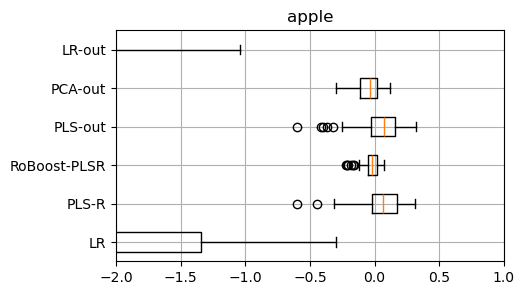

apple
LR -2.691909337266897
PLS-R 0.05804116305324463
RoBoost-PLSR -0.02288453683256448
PLSout 0.05434191420182657
PCAout -0.04704632459294576
LRout -6.38939145637798


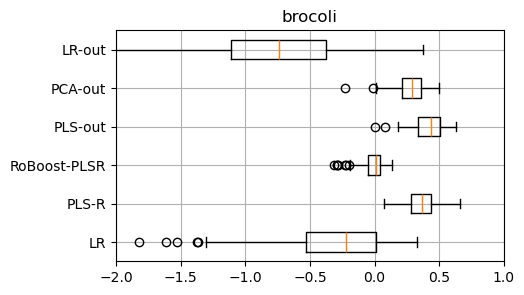

brocoli
LR -0.4737872731844013
PLS-R 0.36046783115370495
RoBoost-PLSR -0.00660903747670743
PLSout 0.4154390662273618
PCAout 0.2735204212155798
LRout -0.9943581441522735


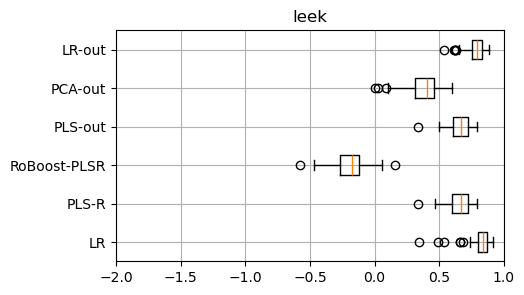

leek
LR 0.8278230800283445
PLS-R 0.6581014410519629
RoBoost-PLSR -0.19076435238467473
PLSout 0.6630209566718385
PCAout 0.38504407478593494
LRout 0.7885868431942111


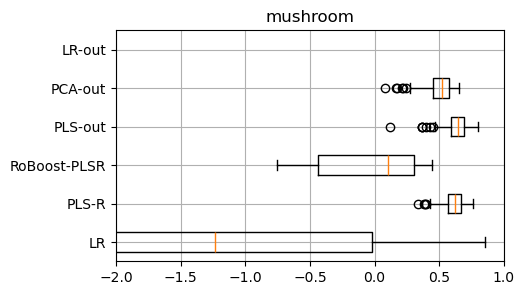

mushroom
LR -2.1591819979368263
PLS-R 0.6069038468888044
RoBoost-PLSR -0.05496692345744419
PLSout 0.6308234952380455
PCAout 0.5012886037334371
LRout -3010407132592.814


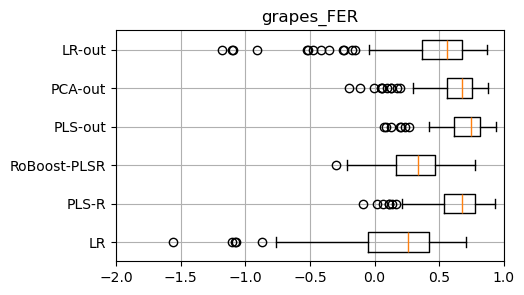

grapes_FER
LR 0.14557301470420675
PLS-R 0.6368023711081747
RoBoost-PLSR 0.3184366815805041
PLSout 0.6976556035321647
PCAout 0.6242290443720877
LRout 0.44318593689393726


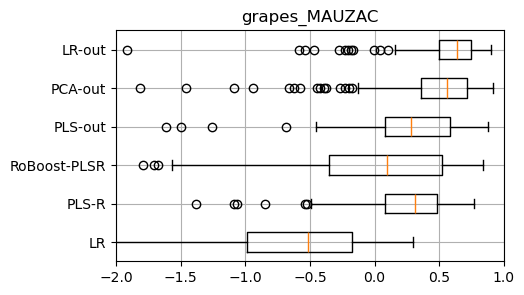

grapes_MAUZAC
LR -0.6639456422869389
PLS-R 0.22496698892970396
RoBoost-PLSR -0.017105625780894047
PLSout 0.24134561883554123
PCAout 0.4374207699205912
LRout 0.5560201031804766


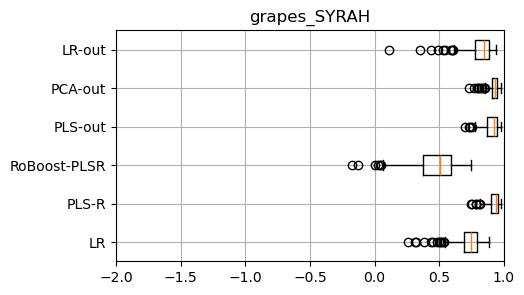

grapes_SYRAH
LR 0.7212986539743504
PLS-R 0.9200875866550693
RoBoost-PLSR 0.4613579683352348
PLSout 0.9075652373302412
PCAout 0.9237728484560027
LRout 0.8104741713895005


In [6]:
##### datasets = ['apple','brocoli','leek','mushroom','grapes_FER','grapes_MAUZAC','grapes_SYRAH']
for dataset in datasets:
    dfLR = pandas.read_csv('res/'+dataset+'_LR.csv')
    dfPLS = pandas.read_csv('res/'+dataset+'_pls.csv')
    dfROB = pandas.read_csv('res/'+dataset+'_roboost.csv')
    dfPLSout = pandas.read_csv('res/'+dataset+'_PLSout.csv')
    dfPCAout = pandas.read_csv('res/'+dataset+'_PCAout.csv')
    dfLRout = pandas.read_csv('res/'+dataset+'_LRout.csv')
    dfPCAoutET = pandas.read_csv('res/'+dataset+'_PCAoutET.csv')

    vLR = dfLR.values[:,-5:].flatten()
    vPls = dfPLS.values[:,-5:].flatten()
    vRob = dfROB.values[:,-5:].flatten()
    vPLSout = dfPLSout.values[:,-5:].flatten()
    vPCAout = dfPCAout.values[:,-5:].flatten()
    vLRout = dfLRout.values[:,-5:].flatten()
    vPCAoutET = dfPCAoutET.values[:,-5:].flatten()
    plt.figure(figsize=(5,3))
    plt.title(dataset)
    plt.boxplot([vLR,vPls,vRob,vPLSout,vPCAout,vLRout],vert=False)
    plt.grid()
    plt.yticks(np.arange(1,7),['LR','PLS-R','RoBoost-PLSR','PLS-out','PCA-out','LR-out'])
    plt.xlim([-2,1])
    plt.show()
    print(dataset)
    print('LR',np.mean(vLR))
    print('PLS-R',np.mean(vPls))
    print('RoBoost-PLSR',np.mean(vRob))
    print('PLSout',np.mean(vPLSout))
    print('PCAout',np.mean(vPCAout))
    print('LRout',np.mean(vLRout))

In [12]:
##### datasets = ['apple','brocoli','leek','mushroom','grapes_FER','grapes_MAUZAC','grapes_SYRAH']
datasets = ['apple','brocoli','leek','mushroom','grapes_FER','grapes_MAUZAC','grapes_SYRAH']
for dataset in datasets:
    df = pandas.read_csv('res/'+dataset+'_nOutliers_PLS_train.csv')
    ntrain = np.mean(df.values)
    df = pandas.read_csv('res/'+dataset+'_nOutliers_PLS_test.csv')
    ntest = np.mean(df.values)
    print(dataset,ntrain,ntest)

apple 18.416666666666668 5.916666666666667
brocoli 19.25 6.75
leek 3.6555555555555554 2.966666666666667
mushroom 19.25 6.75
grapes_FER 3.6555555555555554 2.9444444444444446
grapes_MAUZAC 5.083333333333333 3.1166666666666667
grapes_SYRAH 6.2555555555555555 3.7777777777777777
